In [1]:
import pandas as pd
import re
import os

df_suicidal = pd.read_csv("/kaggle/input/manual-annotation-indo-twitter-suicide/final-annotated-suicide-dataset.csv", usecols=['label', 'twitterText'])
df_suicidal.dropna(inplace=True)
df_suicidal['label'] = "SUICIDAL"
df_suicidal = df_suicidal.sample(frac=1, random_state=42).reset_index(drop=True)
print("Suicidal dataframe:", df_suicidal)

Suicidal dataframe:          label                                        twitterText
0     SUICIDAL  "pengen bunuh diri aja"\nyang paling sering te...
1     SUICIDAL  Secara tidak langsung punya Fikiran pengen bun...
2     SUICIDAL          sejam lalu haha hihi sekarang pengen mati
3     SUICIDAL  Baru kelar 1 masalah datang lagi malah lainnya...
4     SUICIDAL       fuck bundir aku lagi pgn mabok smpk ga sadar
...        ...                                                ...
8727  SUICIDAL  jujur cape hidup kaya gini terus, aku nganggur...
8728  SUICIDAL  Siapa yang dari sd udah kepikiran mau mati ? A...
8729  SUICIDAL   Apa aku doang kalo stres suka pengen bunuh diri?
8730  SUICIDAL  Mood ga karuan. Ovt ga karuan. Selalu kek miki...
8731  SUICIDAL   pengen bundir tapi takut gabisa dengerin mineral

[8732 rows x 2 columns]


In [2]:
df_not_suicidal_a = pd.read_csv("/kaggle/input/manual-annotation-indo-twitter-suicide/final-non-suicide-dataset.csv", usecols=['label', 'twitterText'])
df_not_suicidal_a.dropna(inplace=True)
df_not_suicidal_a['label'] = "NOT_SUICIDAL"
print("Non-suicidal dataframe:", df_not_suicidal_a)

df_not_suicidal_b = pd.read_csv("/kaggle/input/manual-annotation-indo-twitter-suicide/final-annotated-non-suicide-dataset.csv", usecols=['label', 'twitterText'])
df_not_suicidal_b.dropna(inplace=True)
df_not_suicidal_b['label'] = "NOT_SUICIDAL"
print("Non-suicidal dataframe:", df_not_suicidal_b)

Non-suicidal dataframe:               label                                        twitterText
0      NOT_SUICIDAL  yall the feminists i know on twitter are happi...
1      NOT_SUICIDAL  Imagine bini sedap masak and his brain thinks ...
2      NOT_SUICIDAL  Kita masak macam katering dah raya ni dia kalu...
3      NOT_SUICIDAL  Masak ni survival skills, bukan gender roles. ...
4      NOT_SUICIDAL  Istg if I were a man, I'd surely date her. \n\...
...             ...                                                ...
35307  NOT_SUICIDAL  @leo_edw W slalu punya feel kalo dia cuma ghos...
35308  NOT_SUICIDAL  Jog! Lagi ngrasake bersyukur tapi yo kesel ki,...
35309  NOT_SUICIDAL  @mks_fess itulah pentingnya tidak berharap ket...
35310  NOT_SUICIDAL  Moots pdkt yuk tapi enih harus delapan kata ad...
35311  NOT_SUICIDAL  Pengertian Ghosting dan Cara Menghindarinya: H...

[35312 rows x 2 columns]
Non-suicidal dataframe:               label                                        twitterText
0  

In [3]:
#Combine non-suicidal datasets from non-suicide keyword query (a) and suicide keyword but annotated non-suicide (b)
#Randomly sample 8732 data to match number of suicidal data
df_not_suicidal = pd.concat([df_not_suicidal_a, df_not_suicidal_b])
df_not_suicidal = df_not_suicidal.sample(n=8732, random_state=42).reset_index(drop=True)
print("Non-suicidal dataframe:", df_not_suicidal)

Non-suicidal dataframe:              label                                        twitterText
0     NOT_SUICIDAL  Gak mudah mengakhiri hubungan di umur 26thn di...
1     NOT_SUICIDAL                   Canda. Sesempetnya aja ya bous 😎
2     NOT_SUICIDAL  @thekuxell Cara Israel mengurangi populasi ten...
3     NOT_SUICIDAL  Aku hanya lelah hidup seperti ini, tak tau har...
4     NOT_SUICIDAL  Ada orang yg pintar karena tekun belajar dan a...
...            ...                                                ...
8727  NOT_SUICIDAL  @kkmanti @kangadang1 @Yanuardychandra @floriel...
8728  NOT_SUICIDAL  @Don_gindo Kok dek akibat singo di ajar makan ...
8729  NOT_SUICIDAL  Mande :"Jadi mo cium gak"\nSurya :"ntar aja ka...
8730  NOT_SUICIDAL  Tuhan...knp z harus kenal,cyg,n nikah dg org y...
8731  NOT_SUICIDAL  Demi tuhan, ini narasi paling berkesan. Gemes,...

[8732 rows x 2 columns]


In [4]:
df = pd.concat([df_suicidal, df_not_suicidal])
df = df.reset_index(drop=True)
print(df)

              label                                        twitterText
0          SUICIDAL  "pengen bunuh diri aja"\nyang paling sering te...
1          SUICIDAL  Secara tidak langsung punya Fikiran pengen bun...
2          SUICIDAL          sejam lalu haha hihi sekarang pengen mati
3          SUICIDAL  Baru kelar 1 masalah datang lagi malah lainnya...
4          SUICIDAL       fuck bundir aku lagi pgn mabok smpk ga sadar
...             ...                                                ...
17459  NOT_SUICIDAL  @kkmanti @kangadang1 @Yanuardychandra @floriel...
17460  NOT_SUICIDAL  @Don_gindo Kok dek akibat singo di ajar makan ...
17461  NOT_SUICIDAL  Mande :"Jadi mo cium gak"\nSurya :"ntar aja ka...
17462  NOT_SUICIDAL  Tuhan...knp z harus kenal,cyg,n nikah dg org y...
17463  NOT_SUICIDAL  Demi tuhan, ini narasi paling berkesan. Gemes,...

[17464 rows x 2 columns]


In [5]:
df['label'] = df['label'].replace({'SUICIDAL': 1, 'NOT_SUICIDAL': 0})
print(df)

       label                                        twitterText
0          1  "pengen bunuh diri aja"\nyang paling sering te...
1          1  Secara tidak langsung punya Fikiran pengen bun...
2          1          sejam lalu haha hihi sekarang pengen mati
3          1  Baru kelar 1 masalah datang lagi malah lainnya...
4          1       fuck bundir aku lagi pgn mabok smpk ga sadar
...      ...                                                ...
17459      0  @kkmanti @kangadang1 @Yanuardychandra @floriel...
17460      0  @Don_gindo Kok dek akibat singo di ajar makan ...
17461      0  Mande :"Jadi mo cium gak"\nSurya :"ntar aja ka...
17462      0  Tuhan...knp z harus kenal,cyg,n nikah dg org y...
17463      0  Demi tuhan, ini narasi paling berkesan. Gemes,...

[17464 rows x 2 columns]


/tmp/ipykernel_24/3044191695.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'SUICIDAL': 1, 'NOT_SUICIDAL': 0})


# Libraries

In [6]:
!pip install indonlp
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.9 MB/s eta 0:00:00


# Data Pre Processing

1. Transliteration (there's cases makası, whose letter 'i' is a Turkish lowercase, making it seem like a 'new' word. We try to make it uniform to English letters, thus becoming 'makasi')
2. Remove newlines

In [7]:
from unidecode import unidecode
df['twitterText'] = df['twitterText'].apply(unidecode)
df['twitterText'] = df['twitterText'].str.replace("\n", "")

3. Remove Elongation
4. Convert Emoji To Indonesian Words

In [8]:
from indoNLP.preprocessing import emoji_to_words, replace_word_elongation, remove_url, pipeline

def preprocessing(twitterText):
    pipe = pipeline([emoji_to_words, replace_word_elongation, remove_url])
    return pipe(twitterText)
df['twitterText'] = df['twitterText'].apply(preprocessing)
print(df)

       label                                        twitterText
0          1  "pengen bunuh diri aja"yang paling sering teru...
1          1  Secara tidak langsung punya Fikiran pengen bun...
2          1          sejam lalu haha hihi sekarang pengen mati
3          1  Baru kelar 1 masalah datang lagi malah lainnya...
4          1       fuck bundir aku lagi pgn mabok smpk ga sadar
...      ...                                                ...
17459      0  @kkmanti @kangadang1 @Yanuardychandra @floriel...
17460      0  @Don_gindo Kok dek akibat singo di ajar makan ...
17461      0  Mande :"Jadi mo cium gak"Surya :"ntar aja kalo...
17462      0  Tuhan...knp z harus kenal,cyg,n nikah dg org y...
17463      0  Demi tuhan, ini narasi paling berkesan. Gemes,...

[17464 rows x 2 columns]


5. Formalize Slang Words (Lemmatization)

In [9]:
# Step 1: Read dataset of slang vs formal words
# Taken from Colloquial Indonesian Lexicon by Salsabila, Winatmoko, Septriandi, and Jamal
# https://ieeexplore.ieee.org/abstract/document/8629151
slang_df = pd.read_csv('/kaggle/input/manual-annotation-indo-twitter-suicide/colloquial-indonesian-lexicon.csv', usecols=['slang', 'formal'])
print(slang_df)

          slang         formal
0          woww            wow
1         aminn           amin
2           met        selamat
3        netaas        menetas
4       keberpa       keberapa
...         ...            ...
15001  gataunya  enggak taunya
15002      gtau     enggak tau
15003     gatau     enggak tau
15004     fans2        fan-fan
15005   gaharus   enggak harus

[15006 rows x 2 columns]


In [10]:
# Step 2: Create a dictionary mapping slang words to their normalized versions
# Note: Is equivalent to IndoNLP's replace_slang(), but we also added specific suicidal slangs here, which don't exist in the dataset
slang_mapping = dict(zip(slang_df['slang'], slang_df['formal']))
slang_mapping.update({
    'm*ti': 'mati',
    'm4ti': 'mati',
    'bundir': 'bunuh diri',
    'bund1r': 'bunuh diri'
})

In [11]:
import re
# Step 3: Compile regular expressions for each slang word
slang_patterns = {re.compile(r'\b' + re.escape(slang) + r'\b'): normalized for slang, normalized in slang_mapping.items()}

In [12]:
# Step 4: Iterate through the Twitter dataset and replace slang words with normalized versions
def replace_slang(text):
    for pattern, normalized in slang_patterns.items():
        text = pattern.sub(normalized, text)
    return text

df['twitterText'] = df['twitterText'].apply(replace_slang)
df = df.reset_index()
print(df.head)

<bound method NDFrame.head of        index  label                                        twitterText
0          0      1  "pengin bunuh diri saja"yang paling sering ter...
1          1      1  Secara tidak langsung punya Fikiran pengin bun...
2          2      1          sejam lalu haha hihi sekarang pengin mati
3          3      1  Baru kelar 1 masalah datang lagi malah lainnya...
4          4      1  fuck bunuh diri aku lagi pengin mabok smpk eng...
...      ...    ...                                                ...
17459  17459      0  @kkmanti @kangadang1 @Yanuardychandra @floriel...
17460  17460      0  @Don_gindo Kok dek akibat singo di ajar makan ...
17461  17461      0  Mande :"Jadi mau cium enggak"Surya :"entar saj...
17462  17462      0  Tuhan...kenapa saja harus kenal,cyg,n nikah de...
17463  17463      0  Demi tuhan, ini narasi paling berkesan. Gemes,...

[17464 rows x 3 columns]>


6. Remove twitter tags (@user)

In [13]:
def remove_twitter_tag(text):
    return re.sub(r'@\w+', '', text)

df['twitterText'] = df['twitterText'].apply(remove_twitter_tag)
print(df.head)

<bound method NDFrame.head of        index  label                                        twitterText
0          0      1  "pengin bunuh diri saja"yang paling sering ter...
1          1      1  Secara tidak langsung punya Fikiran pengin bun...
2          2      1          sejam lalu haha hihi sekarang pengin mati
3          3      1  Baru kelar 1 masalah datang lagi malah lainnya...
4          4      1  fuck bunuh diri aku lagi pengin mabok smpk eng...
...      ...    ...                                                ...
17459  17459      0      Habis TL adanya Ribut Terus.Gak ada yang B...
17460  17460      0   Kok dek akibat singo di ajar makan 2 buah pis...
17461  17461      0  Mande :"Jadi mau cium enggak"Surya :"entar saj...
17462  17462      0  Tuhan...kenapa saja harus kenal,cyg,n nikah de...
17463  17463      0  Demi tuhan, ini narasi paling berkesan. Gemes,...

[17464 rows x 3 columns]>


In [14]:
print(df['label'].unique())

[1 0]


# Classify Data

In [15]:
# Load the IndobertModel and tokenizer
from transformers import BertTokenizer, BertModel
model_name = 'indobenchmark/indobert-base-p1'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [16]:
# Prepare the data
texts = df['twitterText'].tolist()
labels = df['label'].tolist()

In [17]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets 8:2
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [18]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

def tokenize_and_create_input_tensors(texts):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,  # You can adjust the max_length as per your needs
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [19]:
train_input_ids, train_attention_masks = tokenize_and_create_input_tensors(train_texts)
train_labels = torch.tensor(train_labels).to(device)

print("Before:")
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(train_labels.shape)

train_input_ids = train_input_ids.squeeze(dim=1).to(device)
train_attention_masks = train_attention_masks.squeeze(dim=1).to(device)

print("After:")
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(train_labels.shape)

Before:
torch.Size([13971, 128])
torch.Size([13971, 128])
torch.Size([13971])
After:
torch.Size([13971, 128])
torch.Size([13971, 128])
torch.Size([13971])


In [20]:
test_input_ids, test_attention_masks = tokenize_and_create_input_tensors(test_texts)
test_labels = torch.tensor(test_labels).to(device)

test_input_ids = test_input_ids.squeeze(dim=1).to(device)
test_attention_masks = test_attention_masks.squeeze(dim=1).to(device)

print("After:")
print(test_input_ids.shape)
print(test_attention_masks.shape)
print(test_labels.shape)

After:
torch.Size([3493, 128])
torch.Size([3493, 128])
torch.Size([3493])


In [21]:
torch.save(train_input_ids, '/kaggle/working/train_input_ids.pt')
torch.save(train_attention_masks, '/kaggle/working/train_attention_masks.pt')
torch.save(train_labels, '/kaggle/working/train_labels.pt')

torch.save(test_input_ids, '/kaggle/working/test_input_ids.pt')
torch.save(test_attention_masks, '/kaggle/working/test_attention_masks.pt')
torch.save(test_labels, '/kaggle/working/test_labels.pt')

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class BertCNNClassifier(nn.Module):
    def __init__(self, bert_model, num_filters, kernel_sizes, num_classes):
        super(BertCNNClassifier, self).__init__()
        self.bert = bert_model
        self.conv1d = nn.ModuleList([nn.Conv1d(bert_model.config.hidden_size, num_filters, kernel_size, bias=True) for kernel_size in kernel_sizes])
        self.dropout = nn.Dropout(0.45)
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, num_classes, bias=True)

    def forward(self, input_ids, attention_mask):
        token_type_ids = torch.zeros_like(input_ids)  # Create token_type_ids tensor
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        last_hidden_state = outputs[0].permute(0, 2, 1)  # (batch_size, hidden_size, seq_len)

        conved = [torch.relu(conv(last_hidden_state)) for conv in self.conv1d]  # Apply convolution to each kernel
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]  # Max-over-time pooling
        cat = self.dropout(torch.cat(pooled, dim=1))  # Concatenate pooled outputs and apply dropout

        logits = self.fc(cat)  # Apply linear layer for classification
        return logits

In [23]:
num_filters = 700  # Number of filters for each kernel size
kernel_sizes = [2, 3, 4]  # List of kernel sizes
num_classes = 2

# Initialize the CNN model
model = BertCNNClassifier(bert_model, num_filters, kernel_sizes, num_classes).to(device)

In [24]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2.45e-5)

In [25]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Create TensorDatasets and DataLoaders
batch_size = 32

train_data = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [26]:
print(len(train_dataloader)) # number of batches

437


Training for 4 epochs

In [27]:
import datetime
import gc
# Train the model

def save_ckp(state):
    f_path = '/kaggle/working/' + 'checkpoint_epoch' + str(state['epoch']) + '.pt'
    torch.save(state, f_path)

num_epoch = 4
gc.collect()
torch.cuda.empty_cache()

for i in range(num_epoch):
  num_batch = 0
  for batch in train_dataloader:
    if (num_batch % 100 == 0):
      print('epoch ', i, ' batch ', num_batch, ' ', datetime.datetime.now())
    input_ids, attention_masks, labels = batch
    outputs = model(input_ids, attention_masks)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    num_batch+=1
    del input_ids
    del attention_masks
    del labels
    del outputs
    gc.collect()
    torch.cuda.empty_cache()

checkpoint = {
    'epoch': num_epoch - 1,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict()
}
save_ckp(checkpoint)

del train_data
del train_sampler
del train_dataloader
gc.collect()
torch.cuda.empty_cache()

epoch  0  batch  0   2024-04-11 16:44:45.861008
epoch  0  batch  100   2024-04-11 16:45:56.869781
epoch  0  batch  200   2024-04-11 16:47:10.032758
epoch  0  batch  300   2024-04-11 16:48:26.227610
epoch  0  batch  400   2024-04-11 16:49:44.475304
epoch  1  batch  0   2024-04-11 16:50:13.241789
epoch  1  batch  100   2024-04-11 16:51:31.914093
epoch  1  batch  200   2024-04-11 16:52:50.652118
epoch  1  batch  300   2024-04-11 16:54:09.190457
epoch  1  batch  400   2024-04-11 16:55:27.910613
epoch  2  batch  0   2024-04-11 16:55:56.710401
epoch  2  batch  100   2024-04-11 16:57:15.502584
epoch  2  batch  200   2024-04-11 16:58:34.377830
epoch  2  batch  300   2024-04-11 16:59:53.280844
epoch  2  batch  400   2024-04-11 17:01:12.289379
epoch  3  batch  0   2024-04-11 17:01:41.279664
epoch  3  batch  100   2024-04-11 17:02:59.968510
epoch  3  batch  200   2024-04-11 17:04:18.813174
epoch  3  batch  300   2024-04-11 17:05:37.690176
epoch  3  batch  400   2024-04-11 17:06:56.223567


In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch.nn.functional as F

# Evaluate the model on the test set
model.eval()
test_preds = []
test_proba = []
test_labels_list = []

test_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_masks, labels = batch
        outputs = model(input_ids, attention_masks)
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.tolist())
        test_proba.extend(F.softmax(outputs, dim=1)[:, 1])
        test_labels_list.extend(labels.tolist())

accuracy = accuracy_score(test_labels_list, test_preds)
recall = recall_score(test_labels_list, test_preds)
precision = precision_score(test_labels_list, test_preds)
f1 = f1_score(test_labels_list, test_preds)
test_proba = [i.cpu().tolist() for i in test_proba]

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

del test_data
del test_sampler
del test_dataloader
gc.collect()
torch.cuda.empty_cache()
gc.collect()

Accuracy: 0.8944
Recall: 0.9326
Precision: 0.8682
F1-Score: 0.8993


0

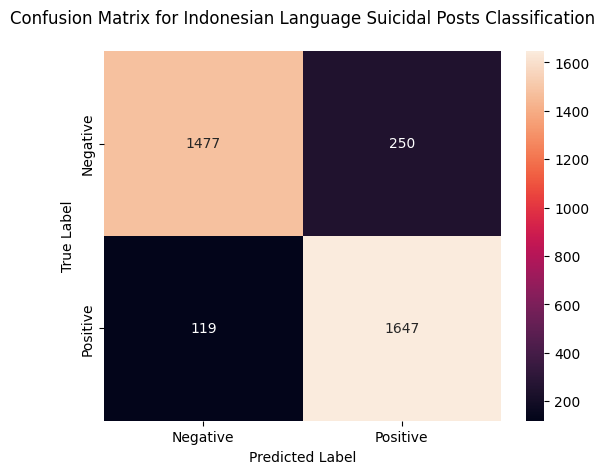

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(test_labels_list, test_preds)

cf = sns.heatmap(cf_matrix, annot=True, fmt='d')
cf.xaxis.set_ticklabels(['Negative', 'Positive'])
cf.set_xlabel('Predicted Label')
cf.yaxis.set_ticklabels(['Negative', 'Positive'])
cf.set_ylabel('True Label')
cf.set_title("Confusion Matrix for Indonesian Language Suicidal Posts Classification", pad=20)

plt.show()

ROC AUC Score:
0.9488231020085368


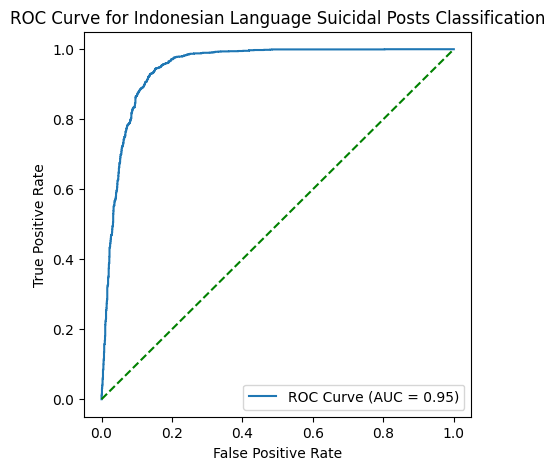

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

def plot_sklearn_roc_curve(y_real, y_pred, roc_score):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    df_fpr = pd.DataFrame(fpr)
    df_fpr.to_csv("/kaggle/working/fpr.csv")
    df_tpr = pd.DataFrame(tpr)
    df_tpr.to_csv("/kaggle/working/tpr.csv")
    print("ROC AUC Score:")
    print(roc_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_score, estimator_name='ROC Curve').plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashed')
    plt.title("ROC Curve for Indonesian Language Suicidal Posts Classification")

roc_score = roc_auc_score(test_labels_list, test_proba)
plot_sklearn_roc_curve(test_labels_list, test_proba, roc_score)